# 이미지데이터의이해

### 1. 픽셀(Pixel = Picture + element, 화소)

- 이미지 데이터 : 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것   
- 디지털 영상 : 수학적으로 2차원 함수는 f(x,y)로 정의될 수 있고 (x,y)는 어떠한 지점 좌표이고 f는 그 지점의 밝기 정보가 되는 것
    - <img src='../cv_images/image_desc.png'>
- 각 픽셀은 단색의 직사각형
- 전체 이미지의 크기를 표현할 때는 (세로픽셀수 x 가로픽셀수) 형식으로 표현
- **해상도(Resolution)**: 이미지의 가로×세로 픽셀 수를 의미함(예: 640x480 이미지는 가로 640픽셀, 세로 480픽셀로 총 307,200개의 픽셀로 이루어짐)
- 이미지 데이터를 저장할 때는 픽셀의 색을 표현하는 스칼라 값이나 벡터를 2차원 배열로 표현


- 파이썬에서는 NumPy의 ndarray 클래스 배열로 표현
- 픽셀을 더 작게 나눌수록 실제의 형상에 가까운 영상이 됨(유효 비트가 많을수록 데이터의 처리 결과는 더 정밀해짐) - 해상도(resolution)는 픽셀의 수에 따라서 실제에 가까운 정도
    - <img src='../cv_images/image_pixcel.png'>
    
- 1-Bit : 0과 1의 두 가지의 값만 가지게 되어 모든 색상을 0의 값을 지니는 색상과 1의 값을 지니는 색상으로만 표현 - 중요한 점은 두 가지의 색상이 아닌 두 가지의 값으로 표현할 수 있다는 의미
    - Binary <br>
      
- 8-Bit : 256 가지의 값을 가질 수 있음
    - GrayScale : 흑백의 색상을 원할하게 표현할 수 있음    
    - <font color=blue><b>많은 함수나 메소드에서 계산 시, 데이터의 양을 줄이고 정확도를 높이기 위하여 단일 채널(흑백)로 계산</b>을 진행
    - OpenCV에서 알고리즘을 적용할 때, 계산 이미지를 Binary나 GrayScale을 적용하는 이유

> 픽셀아트 : https://namu.wiki/w/%ED%94%BD%EC%85%80%20%EC%95%84%ED%8A%B8

### 2.색공간
- 색공간(color space) : 픽셀의 색을 숫자로 표현하는 방식
<img src='../cv_images/rgb.png'>
- 색공간 방식 :그레이스케일(gray scale), RGB(Red-Green-Blue), HSV(Hue-Saturation-Value) 
<img src='../cv_images/rgb-hsv.png'>
#### 1) 그레이스케일(Grayscale)
- 그레이스케일에서는 모든 색이 흑백
- 각 픽셀은 명도를 나타내는 숫자로 표현( 0은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 됨). 
- 숫자는 보통 0~255의 8비트 부호없는 정수로 저장된다.
- 흑백 이미지는 (높이, 너비)와 같은 2차원 배열 => 예: ( 768, 1024 )

#### 2) RGB
- RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현
- 8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색이다.
- 컬러 이미지는 (높이, 너비, 색 채널 수)와 같은 3차원 배열로 표현 => 예:(427, 640, 3)
- 세번째 축을 색채널(channel)이라고 부른다.

#### 3) HSV
- HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현

- 색상(Hue): 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0°~360°의 범위를 갖고 360°와 0°는 빨강을 가리킨다.

- 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.

- 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다.

이미지의 추정 계절: 여름
H 평균: 70.1, S 평균: 104.2


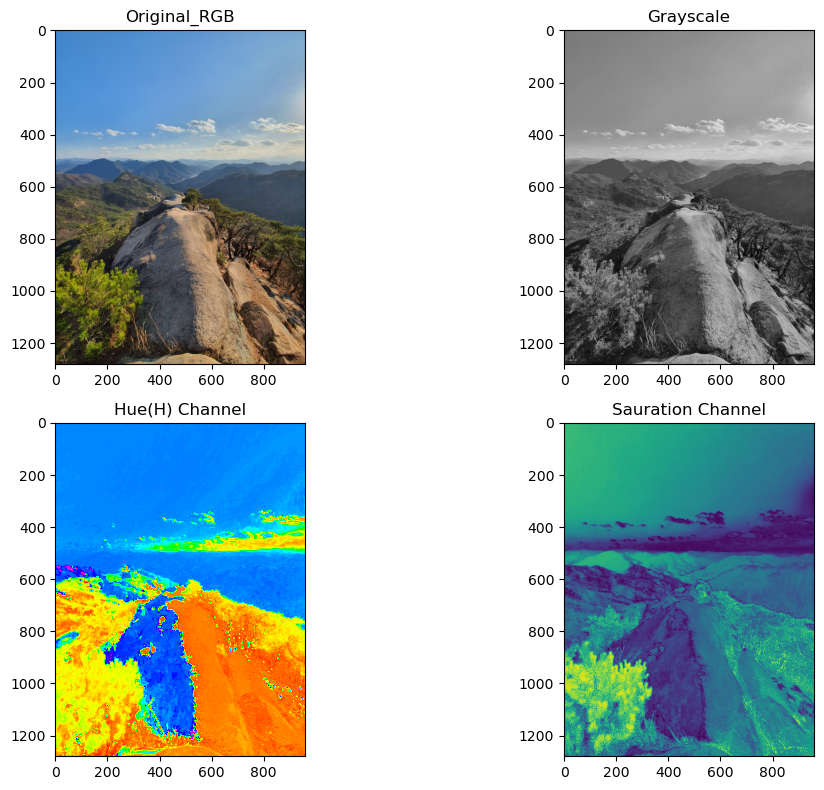

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../cv_images/seasonal_landscape.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 읽음

# 다양한 색공간으로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# HSV 색상 분포 분석 (계절 특성)
h, s, v = cv2.split(hsv)
h_mean = np.mean(h)
s_mean = np.mean(s)

# 간단한 계절 판단 로직 (매우 기본적인 예시)
season = "알 수 없음"
if 20 <= h_mean <= 40 and s_mean > 100:  # 노랑/주황 톤, 채도 높음
    season = "가을"
elif h_mean < 90 and s_mean > 100:  # 녹색 톤, 채도 높음
    season = "여름"
elif 90 <= h_mean <= 130:  # 푸른 톤
    season = "겨울"
elif s_mean < 80:  # 채도 낮음
    season = "겨울"
else:
    season = "봄"

print(f"이미지의 추정 계절: {season}")
print(f"H 평균: {h_mean:.1f}, S 평균: {s_mean:.1f}")

# 시각화
plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(img_rgb), plt.title('Original_RGB')
plt.subplot(222), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(223), plt.imshow(h, cmap='hsv'), plt.title('Hue(H) Channel')
plt.subplot(224), plt.imshow(s, cmap='viridis'), plt.title('Sauration Channel')
plt.tight_layout()
plt.show()

### 3. 이미지 파일 형식

#### 1).bmp 파일
- <img src="../cv_images/test_image.bmp">
- 비트맵(bitmap) 파일은 지금까지 설명한 다차원 배열정보를 그대로 담고있음
- 비트맵 파일은 파일 용량이 크기 때문에 압축을 통해 용량을 줄인 JPG, GIF, PNG 등의 압축 파일 형식도 많이 사용

#### 2) JPEG 파일
- <img src="../cv_images/test_image.jpg">
- JPEG는 Joint Picture Experts Group의 약자로 이미지 압축 기술자 모임인 JPEG 위원회에서 개발한 이미지 파일 형식
- JPEG 파일은 웹상 및 멀티미디어 환경에서 가장 널리 사용되고 있는 포맷
- JPG라는 확장자도 같이 사용됨

- 장점
    - RGB모드와 CMYK모드를 둘 다 지원
    - RGB 이미지의 모든 컬러 정보를 유지
    - 이미지를 만드는 사람이 이미지의 질과 파일의 크기를 손실압축방식을 통해 조정할 수 있음

- 단점
    - 투명 이미지를 지원하지 않음
    - 압축율을 높일 수록 이미지의 질이 손상됨
    - 레이어와 알파채널을 지원하지 않음

#### 3) GIF 파일
- <img src="../cv_images/test_image.gif">   
- GIF는 Graphics Interchange Format의 약자로 1987년 미국의 통신업체인 컴퓨서브(Compuserve)에서 개발한 포맷

- 장점
    - 하나의 파일에 여러 비트맵을 저장하여 다중 프레임 애니메이션을 구현 할 수 있음
    - 투명 이미지를 지원
    - 애니메이션을 특별한 플러그인 없이 여러 환경에서 쉽게 적용할 수 있음
- 단점
    - 8비트 256 컬러로 제한된다.

#### 4) png 파일
- <img src="../cv_images/test_image.png">
- PNG는 Potable Network Graphics의 약자이다. 
- GIF 포맷을 대체하기 위해 개발된 파일 포맷이다.
- 장점
    - 비손실 압축방식으로 원본에 손상 없이 파일의 크기를 줄여줌
    - 이미지의 모든 컬러정보와 알파 채널을 보존하고 있으므로 포토샵에서 활용하기 용이함
    - 문자 혹은 날카로운 경계가 있는 이미지인 경우 JPG보다 PNG가 효과적임

- 단점
    -애니메이션을 만들 수 없음
    - JPG 와 GIF보다 용량이 크다.

#### 5) 파일 간 특성 비교
<img src="../cv_images/imgtype.png">

특정 픽셀의 RGB 값: [255   0   0]
이미지 크기(세로x가로x채널): (100, 100, 3)
데이터 타입: uint8


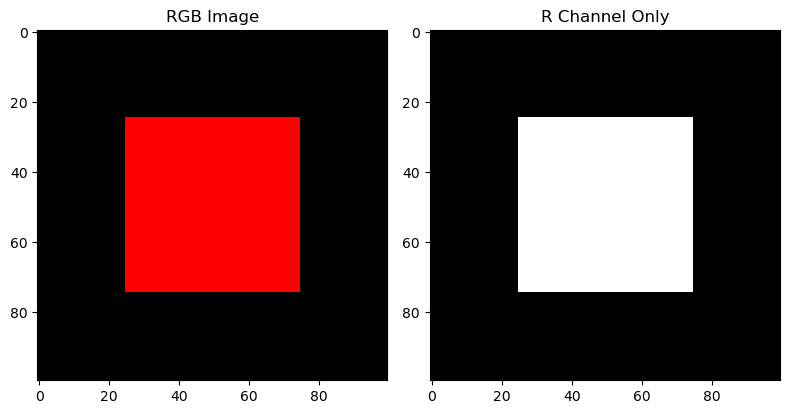

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 간단한 RGB 이미지 만들기
simple_img = np.zeros((100, 100, 3), dtype=np.uint8)
simple_img[25:75, 25:75, 0] = 255  # 빨간색 사각형

# 픽셀값 확인
print(f"특정 픽셀의 RGB 값: {simple_img[50, 50]}")
print(f"이미지 크기(세로x가로x채널): {simple_img.shape}")
print(f"데이터 타입: {simple_img.dtype}")

plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(simple_img), plt.title('RGB Image')
plt.subplot(122), plt.imshow(simple_img[:,:,0], cmap='gray'), plt.title('R Channel Only')
plt.tight_layout()
plt.show()